In [2]:
import numpy as np 
from scipy.special import zeta

In [106]:
def sample_discrete_powlaw(N, xmin, C, _Zeta):
    """ Sample from trunctated discrete power law """
    samples = np.zeros(N, dtype=np.int64)
    _Zeta = _Zeta / C 
    for n in range(N):
        r = np.random.random() 
        lo = 0 
        hi = len(_Zeta)
        while lo < hi:
            m = lo + (hi-lo)//2
            if _Zeta[m] > 1-r:
                lo = m+1
            else:
                hi = m
        samples[n] = xmin + m 
    return samples 
    

In [111]:
alpha = 2.
N = 100000
xmin = 50
xmax = 1000
x = np.arange(xmin, xmax+1)
C = zeta(alpha, xmin) - zeta(alpha, xmax+1)
Zeta = zeta(alpha, x) - zeta(alpha, xmax+1)

In [112]:
np.random.seed(42)
samples = sample_discrete_powlaw(N, xmin, C, Zeta)

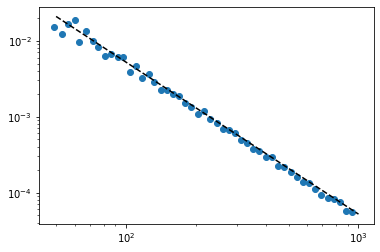

In [113]:
import matplotlib.pyplot as plt 
bins = np.logspace(np.log10(xmin), np.log10(xmax), num=50, dtype=np.int64)
bins = np.unique(bins)
hist, _ = np.histogram(samples, bins=bins, density=True)
p = x**(-alpha)/C
dbins = np.diff(np.log10(bins))
xplot = bins[:-1] + dbins 
plt.loglog(xplot, hist, marker='o', linestyle='none')
plt.loglog(x, p, 'k--')